In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
! kaggle datasets download -d masoudnickparvar/brain-tumor-mri-dataset --unzip

Dataset URL: https://www.kaggle.com/datasets/masoudnickparvar/brain-tumor-mri-dataset
License(s): CC0-1.0
 87% 129M/149M [00:01<00:00, 150MB/s]
100% 149M/149M [00:01<00:00, 121MB/s]


In [3]:
def get_class_paths(path):
  classes = []
  class_paths = []

  for label in os.listdir(path):
    label_path = os.path.join(path, label)

    if os.path.isdir(label_path):
      for image in os.listdir(label_path):
        image_path = os.path.join(label_path, image)

        classes.append(label)
        class_paths.append(image_path)

  df = pd.DataFrame({
      'Class Path': class_paths,
      'Class': classes
  })

  return df

In [4]:
tr_df = get_class_paths("/content/Training")


In [5]:
tr_df

,Class Path,Class
0,/content/Training/pituitary/Tr-pi_0140.jpg,pituitary
1,/content/Training/pituitary/Tr-pi_0514.jpg,pituitary
2,/content/Training/pituitary/Tr-pi_0311.jpg,pituitary
3,/content/Training/pituitary/Tr-pi_1174.jpg,pituitary
4,/content/Training/pituitary/Tr-pi_0594.jpg,pituitary
...,...,...
5707,/content/Training/glioma/Tr-gl_0436.jpg,glioma
5708,/content/Training/glioma/Tr-gl_0859.jpg,glioma
5709,/content/Training/glioma/Tr-gl_0753.jpg,glioma
5710,/content/Training/glioma/Tr-gl_0733.jpg,glioma


In [6]:
tr_df.head()

,Class Path,Class
0,/content/Training/pituitary/Tr-pi_0140.jpg,pituitary
1,/content/Training/pituitary/Tr-pi_0514.jpg,pituitary
2,/content/Training/pituitary/Tr-pi_0311.jpg,pituitary
3,/content/Training/pituitary/Tr-pi_1174.jpg,pituitary
4,/content/Training/pituitary/Tr-pi_0594.jpg,pituitary


In [7]:
ts_df = get_class_paths("/content/Testing")

In [8]:
ts_df

,Class Path,Class
0,/content/Testing/pituitary/Te-pi_0064.jpg,pituitary
1,/content/Testing/pituitary/Te-pi_0132.jpg,pituitary
2,/content/Testing/pituitary/Te-pi_0059.jpg,pituitary
3,/content/Testing/pituitary/Te-pi_0099.jpg,pituitary
4,/content/Testing/pituitary/Te-pi_0040.jpg,pituitary
...,...,...
1306,/content/Testing/glioma/Te-gl_0169.jpg,glioma
1307,/content/Testing/glioma/Te-gl_0271.jpg,glioma
1308,/content/Testing/glioma/Te-gl_0206.jpg,glioma
1309,/content/Testing/glioma/Te-gl_0085.jpg,glioma


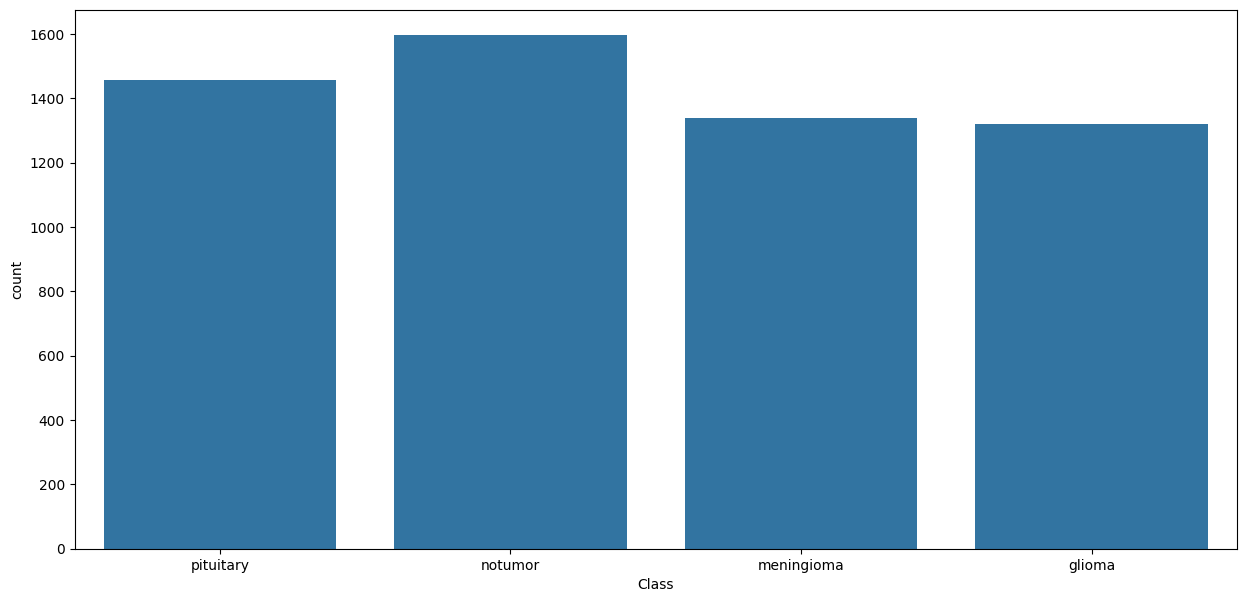

In [9]:
plt.figure(figsize=(15,7))
ax = sns.countplot(data=tr_df, x=tr_df['Class'])

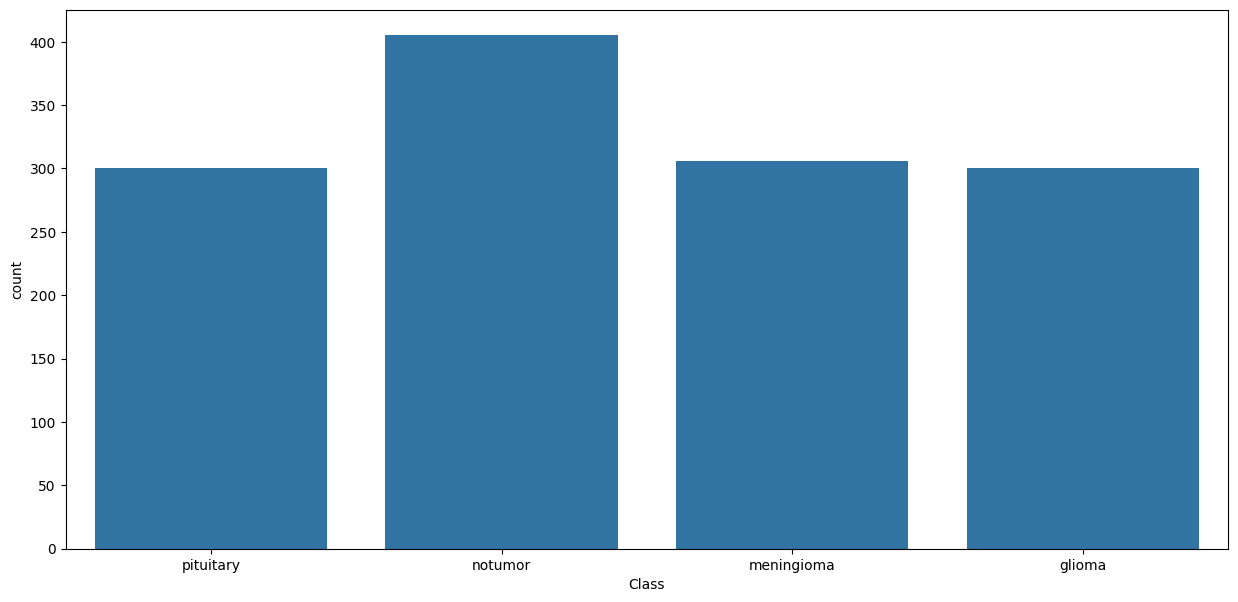

In [10]:
plt.figure(figsize=(15,7))
ax = sns.countplot(data=ts_df, x=ts_df['Class'])

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow import keras
from keras.src.layers import Lambda
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [12]:
valid_df, ts_df = train_test_split(ts_df, train_size=0.5, stratify=ts_df["Class"])

In [13]:
valid_df

,Class Path,Class
776,/content/Testing/meningioma/Te-me_0069.jpg,meningioma
164,/content/Testing/pituitary/Te-pi_0270.jpg,pituitary
1307,/content/Testing/glioma/Te-gl_0271.jpg,glioma
1194,/content/Testing/glioma/Te-gl_0253.jpg,glioma
807,/content/Testing/meningioma/Te-me_0260.jpg,meningioma
...,...,...
1199,/content/Testing/glioma/Te-gl_0121.jpg,glioma
850,/content/Testing/meningioma/Te-me_0049.jpg,meningioma
138,/content/Testing/pituitary/Te-pi_0043.jpg,pituitary
60,/content/Testing/pituitary/Te-pi_0195.jpg,pituitary


In [14]:
ts_df

,Class Path,Class
698,/content/Testing/notumor/Te-no_0096.jpg,notumor
1020,/content/Testing/glioma/Te-gl_0133.jpg,glioma
924,/content/Testing/meningioma/Te-me_0210.jpg,meningioma
634,/content/Testing/notumor/Te-no_0313.jpg,notumor
268,/content/Testing/pituitary/Te-pi_0272.jpg,pituitary
...,...,...
1115,/content/Testing/glioma/Te-gl_0160.jpg,glioma
350,/content/Testing/notumor/Te-no_0046.jpg,notumor
495,/content/Testing/notumor/Te-no_0250.jpg,notumor
1260,/content/Testing/glioma/Te-gl_0072.jpg,glioma


In [15]:
batch_size = 32

img_size = (299, 299)

image_generator = ImageDataGenerator(rescale=1/255, brightness_range=(0.8, 1.2))

ts_gen = ImageDataGenerator(rescale=1/255)

In [16]:
print(tr_df.columns)

Index(['Class Path', 'Class'], dtype='object')


In [17]:
tr_gen = image_generator.flow_from_dataframe(tr_df,
  x_col='Class Path',
  y_col="Class",
  batch_size=batch_size,
  target_size=img_size,
)

valid_gen = image_generator.flow_from_dataframe(valid_df,
  x_col='Class Path',
  y_col="Class",
  batch_size=batch_size,
  target_size=img_size,
)

ts_gen = ts_gen.flow_from_dataframe(ts_df,
  x_col='Class Path',
  y_col="Class",
  batch_size=16,
  target_size=img_size,
  shuffle=False,
)

Found 5712 validated image filenames belonging to 4 classes.
Found 655 validated image filenames belonging to 4 classes.
Found 656 validated image filenames belonging to 4 classes.


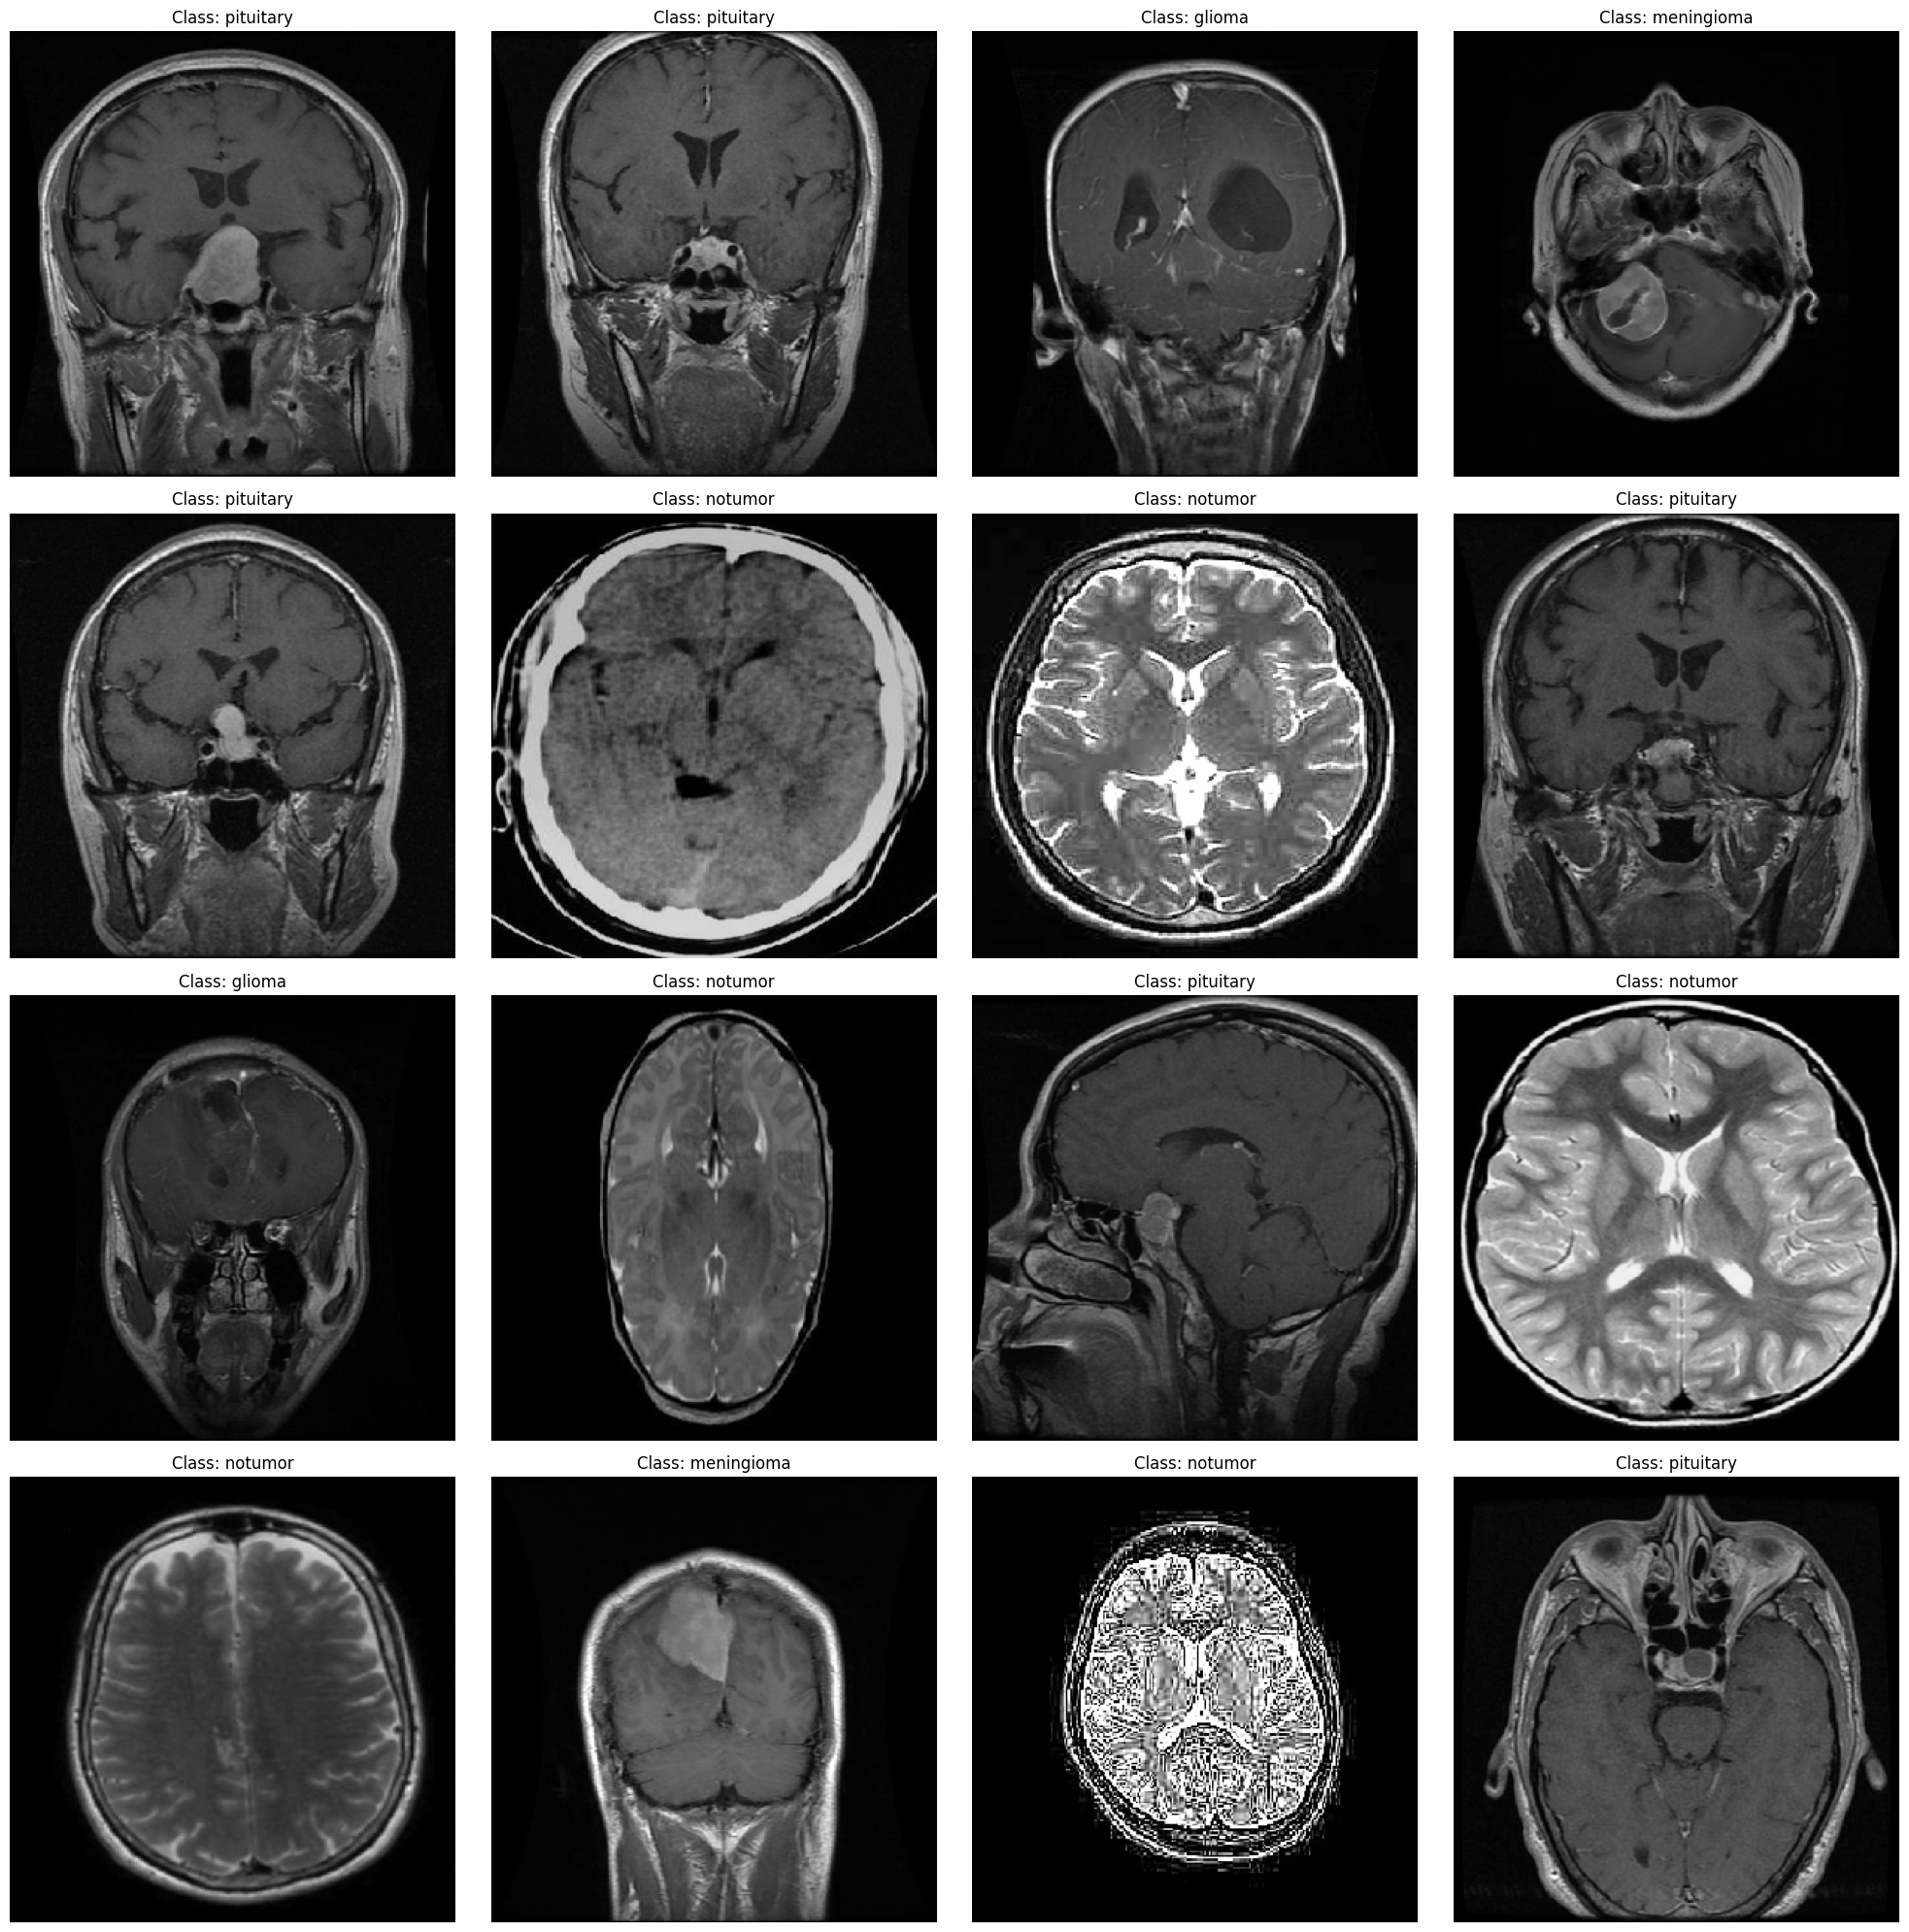

In [18]:
plt.figure(figsize=(20, 20))
for i in range(16):
  plt.subplot(4, 4, i + 1)
  batch = next(tr_gen)
  image = batch[0][0]
  label = batch[1][0]
  plt.imshow(image)

  class_index = np.argmax(label)

  class_names = list(tr_gen.class_indices.keys())
  class_indicies = list(tr_gen.class_indices.values())

  index_position = class_indicies.index(class_index)

  class_name = class_names[index_position]

  plt.title(f'Class: {class_name}')
  plt.axis("off")

plt.tight_layout()
plt.show()

In [19]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [20]:
img_shape = (299, 299, 3)

base_model = tf.keras.applications.Xception(include_top=False,
                                            weights="imagenet",
                                            input_shape=img_shape,
                                            pooling="max")

model = Sequential([
    base_model,
    Flatten(),
    Dropout(0.3),
    Dense(128, activation="relu"),
    Dropout(rate=0.25),
    Dense(4, activation="softmax")
])


83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [21]:
model.compile(Adamax(learning_rate=0.001),
              loss="categorical_crossentropy",
              metrics=["accuracy", Precision(), Recall()])

In [22]:
hist = model.fit(tr_gen,
                 epochs=5,
                 validation_data=valid_gen,
)

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


179/179 ━━━━━━━━━━━━━━━━━━━━ 259s 1s/step - accuracy: 0.7533 - loss: 0.7453 - precision: 0.8175 - recall: 0.6428 - val_accuracy: 0.9359 - val_loss: 0.1907 - val_precision: 0.9386 - val_recall: 0.9328
Epoch 2/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 135s 745ms/step - accuracy: 0.9824 - loss: 0.0640 - precision: 0.9844 - recall: 0.9808 - val_accuracy: 0.9695 - val_loss: 0.0805 - val_precision: 0.9709 - val_recall: 0.9695
Epoch 3/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 135s 750ms/step - accuracy: 0.9921 - loss: 0.0248 - precision: 0.9925 - recall: 0.9914 - val_accuracy: 0.9740 - val_loss: 0.0863 - val_precision: 0.9754 - val_recall: 0.9695
Epoch 4/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 135s 744ms/step - accuracy: 0.9965 - loss: 0.0145 - precision: 0.9965 - recall: 0.9964 - val_accuracy: 0.9802 - val_loss: 0.0636 - val_precision: 0.9802 - val_recall: 0.9802
Epoch 5/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 142s 746ms/step - accuracy: 0.9974 - loss: 0.0119 - precision: 0.9974 - recall: 0.9971 - val_accuracy: 0.9756 - val_loss: 

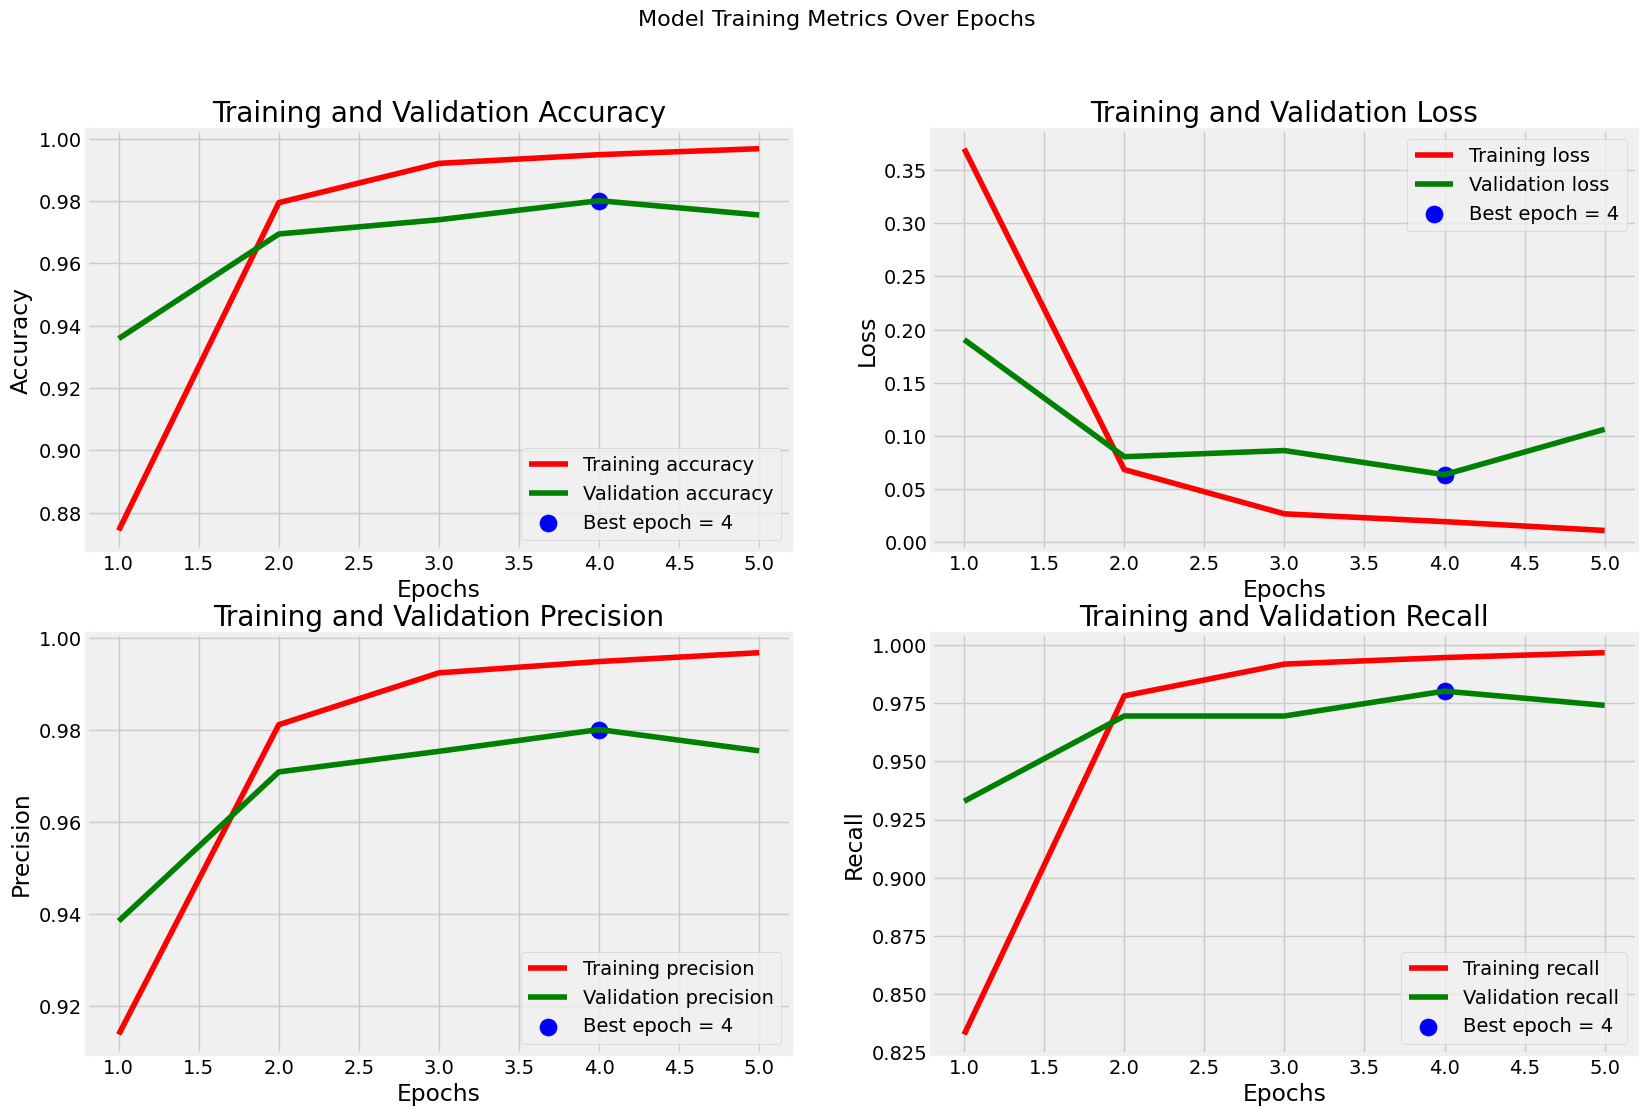

In [23]:
metrics = ["accuracy", "loss", "precision", "recall"]
tr_metrics = {m: hist.history[m] for m in metrics}
val_metrics = {m: hist.history[f"val_{m}"] for m in metrics}

best_epochs = {}
best_values = {}

for m in metrics:
    if m == 'loss':
        idx = np.argmin(val_metrics[m])
    else:
        idx = np.argmax(val_metrics[m])

    best_epochs[m] = idx + 1
    best_values[m] = val_metrics[m][idx]


plt.figure(figsize=(20, 12))
plt.style.use('fivethirtyeight')

for i, metric in enumerate(metrics, 1):
    plt.subplot(2, 2, i)
    epochs = range(1, len(tr_metrics[metric]) + 1)

    plt.plot(epochs, tr_metrics[metric], 'r', label=f'Training {metric}')
    plt.plot(epochs, val_metrics[metric], 'g', label=f'Validation {metric}')
    plt.scatter(best_epochs[metric], best_values[metric], s=150,c='blue',
                label=f'Best epoch = {best_epochs[metric]}')

    plt.title(f'Training and Validation {metric.title()}')
    plt.xlabel('Epochs')
    plt.ylabel(metric.title())
    plt.legend()
    plt.grid(True)

plt.suptitle('Model Training Metrics Over Epochs', fontsize=16)
plt.show()

In [24]:
train_score = model.evaluate(tr_gen, verbose=1)
valid_score = model.evaluate(valid_gen, verbose=1)
test_score = model.evaluate(ts_gen, verbose=1)

print(f"Train Accuracy: {train_score[1]*100:.2f}%")
print(f"Train Loss: {train_score[0]:.4f}")
print(f"\nValidation Accuracy: {valid_score[1]*100:.2f}%")
print(f"Validation Loss: {valid_score[0]:.4f}")
print(f"\n\nTest Accuracy: {test_score[1]*100:.2f}%")
print(f"Test Loss: {test_score[0]:.4f}")

179/179 ━━━━━━━━━━━━━━━━━━━━ 42s 235ms/step - accuracy: 0.9900 - loss: 0.0500 - precision: 0.9900 - recall: 0.9897
21/21 ━━━━━━━━━━━━━━━━━━━━ 4s 204ms/step - accuracy: 0.9628 - loss: 0.1610 - precision: 0.9628 - recall: 0.9618
 1/41 ━━━━━━━━━━━━━━━━━━━━ 6s 150ms/step - accuracy: 1.0000 - loss: 6.5955e-04 - precision: 1.0000 - recall: 1.0000

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


41/41 ━━━━━━━━━━━━━━━━━━━━ 5s 109ms/step - accuracy: 0.9812 - loss: 0.1295 - precision: 0.9821 - recall: 0.9812
Train Accuracy: 99.09%
Train Loss: 0.0474

Validation Accuracy: 96.64%
Validation Loss: 0.1409


Test Accuracy: 97.71%
Test Loss: 0.1339


41/41 ━━━━━━━━━━━━━━━━━━━━ 6s 99ms/step


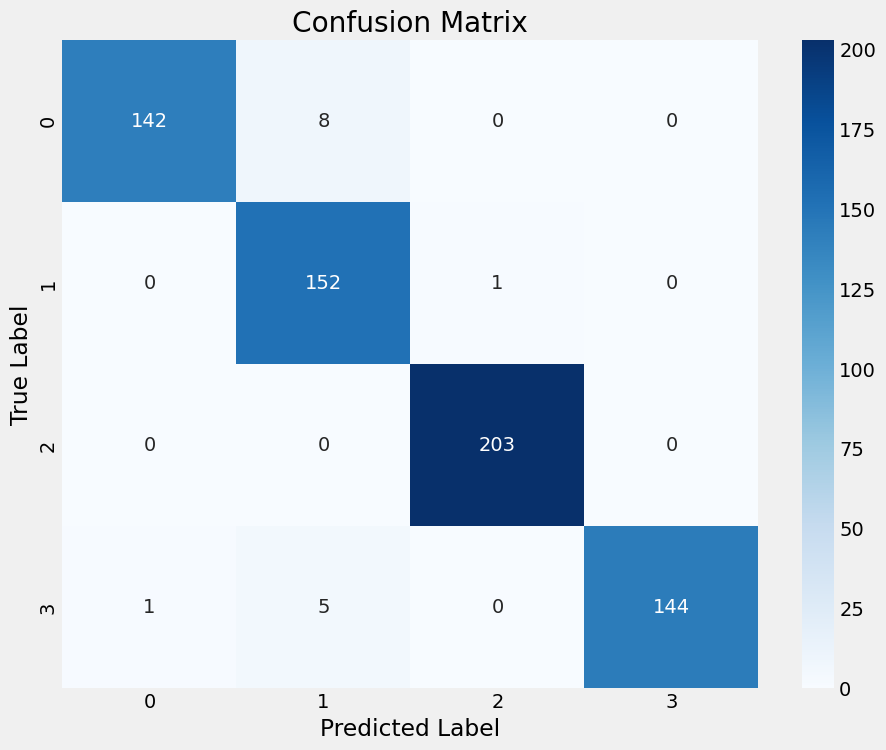

In [25]:
preds = model.predict(ts_gen)
y_pred = np.argmax(preds, axis=1)

class_dict = {
    0: "glioma",
    1: "meningioma",
    2: "no_tumor",
    3: "pituitary"
}

cm = confusion_matrix(ts_gen.classes, y_pred)
labels = list(class_dict.keys())
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [26]:
from PIL import Image

def predict(img_path: str) -> str:
    labels = list(class_dict.keys())
    plt.figure(figsize=(6, 8))

    img = Image.open(img_path)
    resized_img = img.resize((299, 299))
    img_array = np.asarray(resized_img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0

    predictions = model.predict(img_array)
    probabilities = list(predictions[0])

    predicted_class_idx = np.argmax(probabilities)
    predicted_class = class_dict[predicted_class_idx]

    plt.subplot(2, 1, 1)
    plt.imshow(resized_img)
    plt.title(f'Input MRI Image\nPredicted: {predicted_class}')

    plt.subplot(2, 1, 2)
    bars = plt.barh(labels, probabilities)
    plt.xlabel('Probability', fontsize=15)
    plt.title('Class Probabilities')

    ax = plt.gca()
    ax.bar_label(bars, fmt='%.2f')

    plt.tight_layout()
    plt.show()

    print(f"\nPredicted Tumor Type: {predicted_class}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


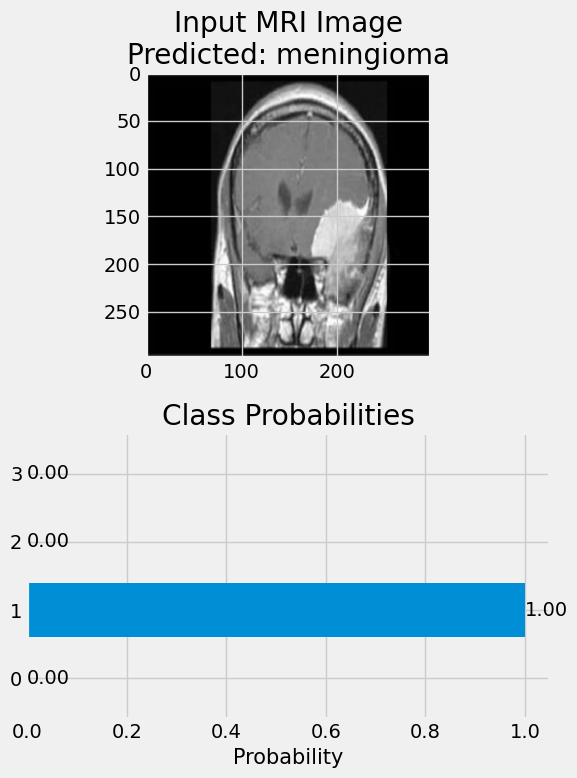


Predicted Tumor Type: meningioma


In [27]:
predict("/content/Testing/meningioma/Te-meTr_0000.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


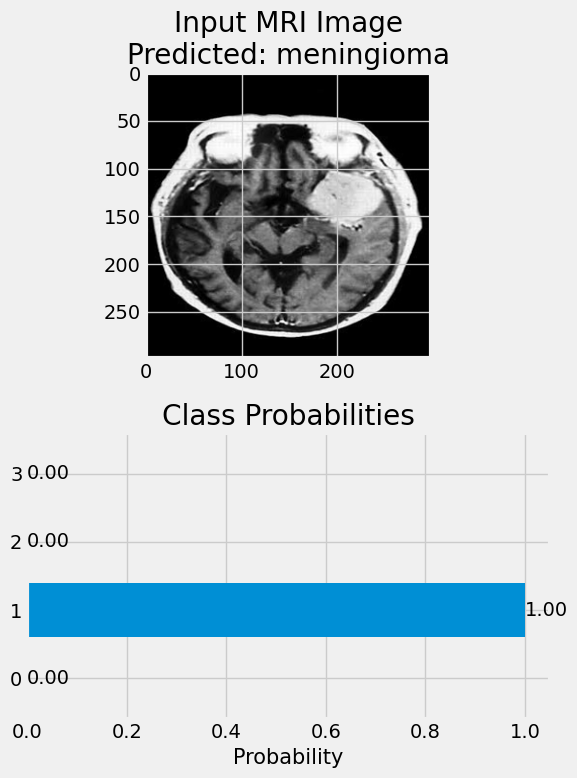


Predicted Tumor Type: meningioma


In [28]:
predict("/content/Testing/meningioma/Te-meTr_0005.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


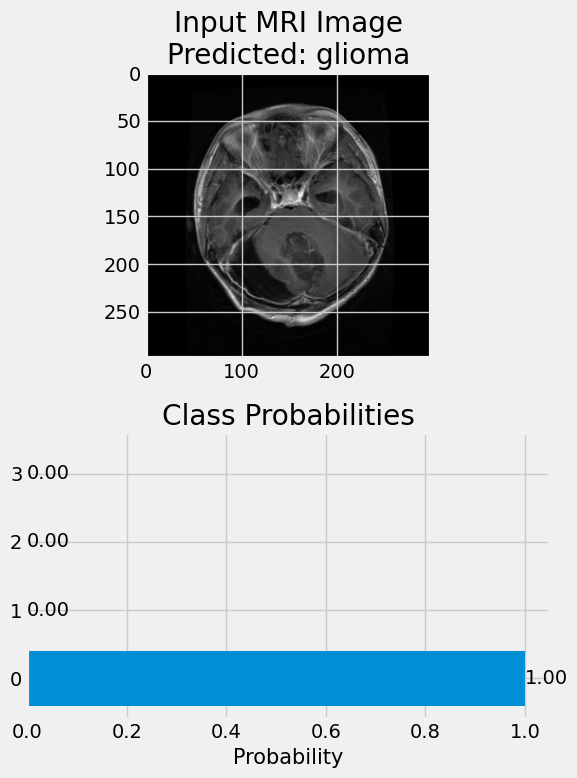


Predicted Tumor Type: glioma


In [29]:
predict("/content/Testing/glioma/Te-glTr_0000.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


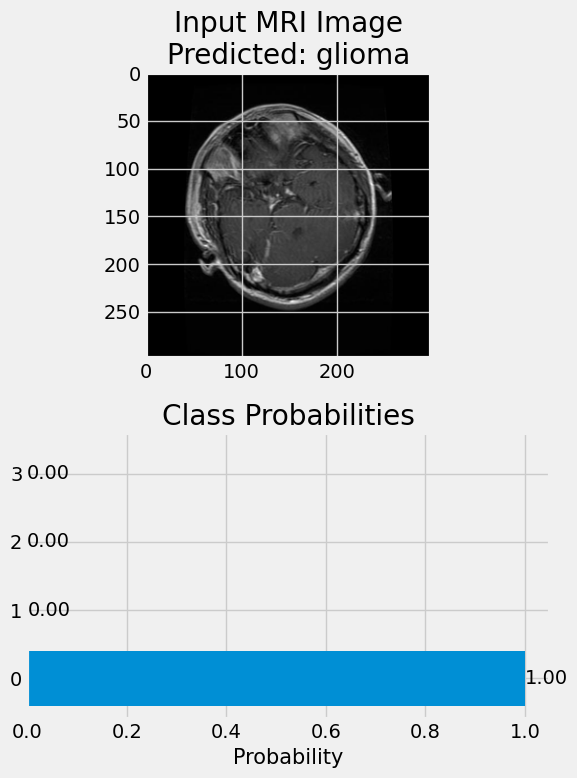


Predicted Tumor Type: glioma


In [30]:
predict("/content/Testing/glioma/Te-glTr_0006.jpg")

In [31]:
model.save_weights("xception_model.weights.h5")

In [32]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import regularizers

In [33]:
batch_size = 16

img_size = (224, 224)

image_generator = ImageDataGenerator(rescale=1/255, brightness_range=(0.8, 1.2))

ts_gen = ImageDataGenerator(rescale=1/255)

tr_gen = image_generator.flow_from_dataframe(tr_df,
  x_col='Class Path',
  y_col="Class",
  batch_size=batch_size,
  target_size=img_size,
)

valid_gen = image_generator.flow_from_dataframe(valid_df,
  x_col='Class Path',
  y_col="Class",
  batch_size=batch_size,
  target_size=img_size,
)

ts_gen = ts_gen.flow_from_dataframe(ts_df,
  x_col='Class Path',
  y_col="Class",
  batch_size=16,
  target_size=img_size,
  shuffle=False,
)

Found 5712 validated image filenames belonging to 4 classes.
Found 655 validated image filenames belonging to 4 classes.
Found 656 validated image filenames belonging to 4 classes.


In [59]:
cnn_model = Sequential()

cnn_model.add(Conv2D(512, (3, 3), padding='same', input_shape=(224, 224, 3), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))

cnn_model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model.add(Dropout(0.25))

cnn_model.add(Conv2D(128, (3,3), padding='same', activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model.add(Dropout(0.25))

cnn_model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))

cnn_model.add(Flatten())

cnn_model.add(Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
cnn_model.add(Dropout(0.35))

cnn_model.add(Dense(4, activation='softmax'))

cnn_model.compile(
    Adamax(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=[
        'accuracy',
        Precision(name='precision'),
        Recall(name='recall')
    ]
)
cnn_model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)                    │ (None, 224, 224, 512)       │          14,336 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 112, 112, 512)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 112, 112, 256)       │       1,179,904 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 56, 56, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 56, 56, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 56, 56, 128)         │         295,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 28, 28, 64)          │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 256)                 │       3,211,520 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 4)                   │           1,028 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,775,620 (18.22 MB)

 Trainable params: 4,775,620 (18.22 MB)

 Non-trainable params: 0 (0.00 B)

In [60]:
history = cnn_model.fit(tr_gen, epochs=5, validation_data=valid_gen)

Epoch 1/5
357/357 ━━━━━━━━━━━━━━━━━━━━ 111s 298ms/step - accuracy: 0.5590 - loss: 2.3731 - precision: 0.6954 - recall: 0.3829 - val_accuracy: 0.7389 - val_loss: 0.9477 - val_precision: 0.7617 - val_recall: 0.6977
Epoch 2/5
357/357 ━━━━━━━━━━━━━━━━━━━━ 136s 287ms/step - accuracy: 0.8069 - loss: 0.8034 - precision: 0.8284 - recall: 0.7728 - val_accuracy: 0.7756 - val_loss: 0.7103 - val_precision: 0.8071 - val_recall: 0.7282
Epoch 3/5
357/357 ━━━━━━━━━━━━━━━━━━━━ 102s 285ms/step - accuracy: 0.8512 - loss: 0.5670 - precision: 0.8688 - recall: 0.8319 - val_accuracy: 0.8458 - val_loss: 0.5481 - val_precision: 0.8574 - val_recall: 0.8260
Epoch 4/5
357/357 ━━━━━━━━━━━━━━━━━━━━ 101s 282ms/step - accuracy: 0.8838 - loss: 0.4436 - precision: 0.8931 - recall: 0.8729 - val_accuracy: 0.8550 - val_loss: 0.4765 - val_precision: 0.8643 - val_recall: 0.8458
Epoch 5/5
357/357 ━━━━━━━━━━━━━━━━━━━━ 142s 283ms/step - accuracy: 0.9053 - loss: 0.3830 - precision: 0.9124 - recall: 0.8976 - val_accuracy: 0.8992

In [61]:
print(history.history.keys())

dict_keys(['accuracy', 'loss', 'precision', 'recall', 'val_accuracy', 'val_loss', 'val_precision', 'val_recall'])


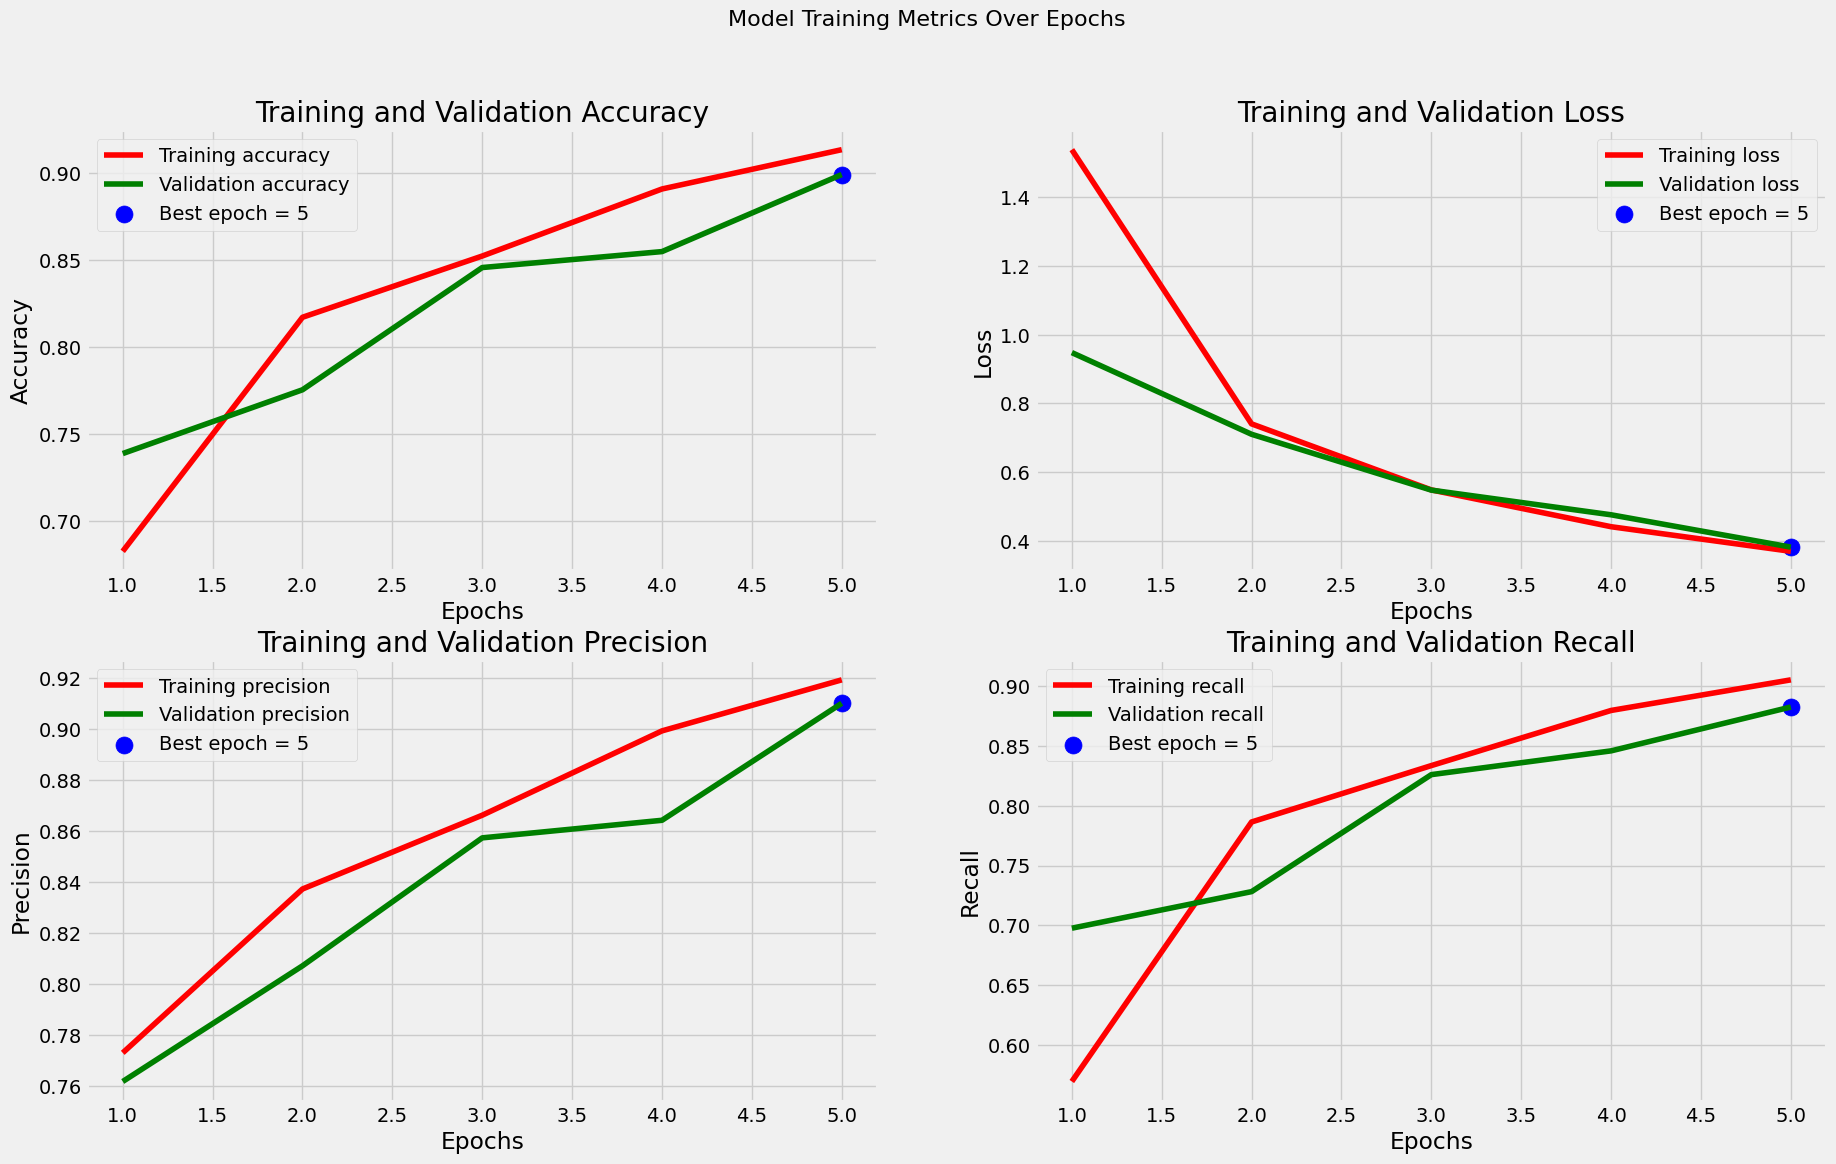

In [63]:
metrics = ["accuracy", "loss", "precision", "recall"]
tr_metrics = {m: history.history[m] for m in metrics}
val_metrics = {m: history.history[f"val_{m}"] for m in metrics}

best_epochs = {}
best_values = {}

for m in metrics:
    if m == 'loss':
        idx = np.argmin(val_metrics[m])
    else:
        idx = np.argmax(val_metrics[m])

    best_epochs[m] = idx + 1
    best_values[m] = val_metrics[m][idx]


plt.figure(figsize=(20, 12))
plt.style.use('fivethirtyeight')

for i, metric in enumerate(metrics, 1):
    plt.subplot(2, 2, i)
    epochs = range(1, len(tr_metrics[metric]) + 1)

    plt.plot(epochs, tr_metrics[metric], 'r', label=f'Training {metric}')
    plt.plot(epochs, val_metrics[metric], 'g', label=f'Validation {metric}')
    plt.scatter(best_epochs[metric], best_values[metric], s=150,c='blue',
                label=f'Best epoch = {best_epochs[metric]}')

    plt.title(f'Training and Validation {metric.title()}')
    plt.xlabel('Epochs')
    plt.ylabel(metric.title())
    plt.legend()
    plt.grid(True)

plt.suptitle('Model Training Metrics Over Epochs', fontsize=16)
plt.show()

In [64]:
train_score = cnn_model.evaluate(tr_gen, verbose=1)
valid_score = cnn_model.evaluate(valid_gen, verbose=1)
test_score = cnn_model.evaluate(ts_gen, verbose=1)

print(f"Train Accuracy: {train_score[1]*100:.2f}%")
print(f"Train Loss: {train_score[0]:.4f}")
print(f"\nValidation Accuracy: {valid_score[1]*100:.2f}%")
print(f"Validation Loss: {valid_score[0]:.4f}")
print(f"\n\nTest Accuracy: {test_score[1]*100:.2f}%")
print(f"Test Loss: {test_score[0]:.4f}")

357/357 ━━━━━━━━━━━━━━━━━━━━ 28s 80ms/step - accuracy: 0.9494 - loss: 0.2917 - precision: 0.9564 - recall: 0.9371
41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 67ms/step - accuracy: 0.8900 - loss: 0.3903 - precision: 0.8942 - recall: 0.8813
41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 64ms/step - accuracy: 0.9090 - loss: 0.3756 - precision: 0.9129 - recall: 0.8972
Train Accuracy: 94.47%
Train Loss: 0.2959

Validation Accuracy: 89.47%
Validation Loss: 0.3828


Test Accuracy: 90.85%
Test Loss: 0.3811


41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 61ms/step


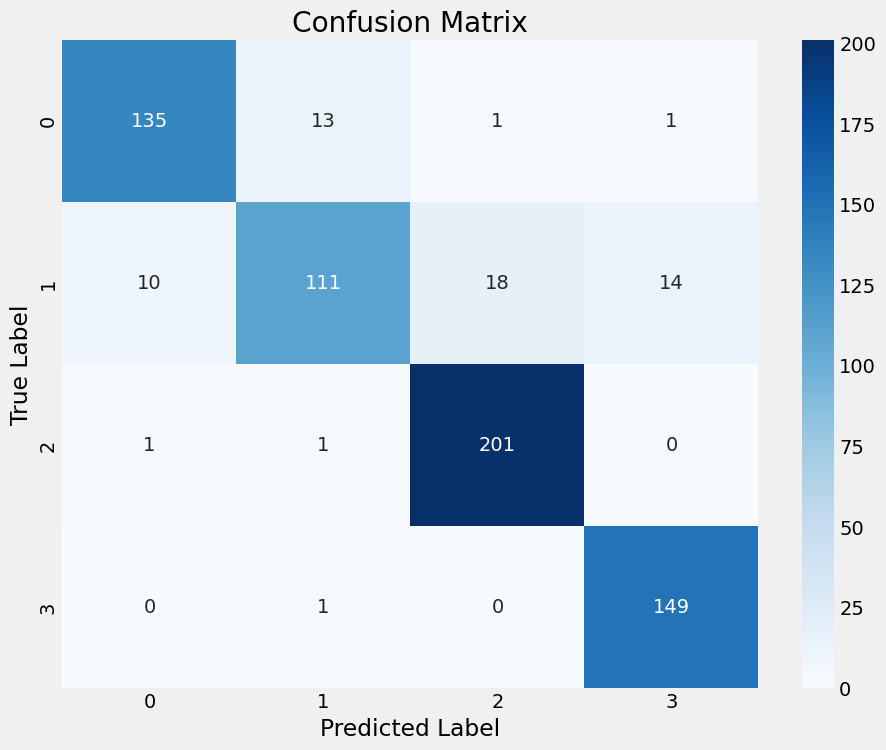

In [65]:
preds = cnn_model.predict(ts_gen)
y_pred = np.argmax(preds, axis=1)

class_dict = {
    0: "glioma",
    1: "meningioma",
    2: "no_tumor",
    3: "pituitary"
}

cm = confusion_matrix(ts_gen.classes, y_pred)
labels = list(class_dict.keys())
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [67]:
clr = classification_report(ts_gen.classes, y_pred)
print(clr)

              precision    recall  f1-score   support

           0       0.92      0.90      0.91       150
           1       0.88      0.73      0.80       153
           2       0.91      0.99      0.95       203
           3       0.91      0.99      0.95       150

    accuracy                           0.91       656
   macro avg       0.91      0.90      0.90       656
weighted avg       0.91      0.91      0.91       656



In [68]:
cnn_model.save("cnn_model.h5")

Streamlit Web App

In [43]:
! pip install streamlit pyngrok python-dotenv

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 79.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 109.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 8.4 MB/s eta 0:00:00


In [44]:
from threading import Thread
from pyngrok import ngrok
from google.colab import userdata

In [45]:
ngrok_token = userdata.get('NGROK_AUTH_TOKEN')

ngrok.set_auth_token(ngrok_token)

In [46]:
def run_streamlit():
  os.system("streamlit run /content/app.py --server.port 8501")

In [ ]:
%%writefile app.py

def load_xception_model(model_path):
  img_shape = (299, 299, 3)
  base_model = tf.keras.applications.Xception(include_top=False, weights="imagenet",
                                              input_shape=img_shape, pooling='max')

  model = Sequential([
      base_model,
      Flatten(),
      Dropout(rate=0.3),
      Dense(128, activation="relu"),
      Dropout(rate=0.25),
      Dense(4, activation='softmax')
  ])

  model.build((None,) + img_shape)

  model.compile(Adamax(learning_rate=0.001),
                loss='categorical_crossentropy',
                metrics=['accuracy', Precision(), Recall()])

  model.load_weights(model_path)

  return model


st.title ("Brain Tumor Classification")

st.write("Upload an image of a brain MRI scan to classify.")

uploaded_file = st.file_uploader("Choose an image...", type=["jpg", "jpeg", "png"])

if uploaded_file is not None:

  selected_model = st.radio(
      "Select Model",
      ("Transfer Learning - Xception", "Custom CNN")
  )

  if selected_model == "Transfer Learning - Xception":
    model = load_xception_model('/content/xception_model.weights.h5')
    img_size = (299, 299)
  else:
    model = load_model('/content/cnn_model.h5')
    img_size(224, 224)


    labels = ['Glioma', 'Meningioma', 'No tumor', 'Pituitary']
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0

    prediction = model.predict(img_array)

    class_index = np.argmax(prediction[0])
    result = labels[class_index]

    st.write(f"Predicted Class: {result}")
    st.write("Predictions:")
    for label, prob in zip(labels, prediction[0]):
      st.write(f"{label}: {prob:.4f}")


Overwriting app.py


In [78]:
thread = Thread(target=run_streamlit)
thread.start()

In [79]:
public_url = ngrok.connect(addr='8501', proto='http', bind_tls=True)

print("Public URL:", public_url)

Public URL: NgrokTunnel: "https://dbef-34-16-199-21.ngrok-free.app" -> "http://localhost:8501"


In [ ]:
# tunnels = ngrok.get_tunnels()
# for tunnel in tunnels:
#   print(f"Closing tunnel: {tunnel.public_url} -> {tunnel.config['addr']}")
#   ngrok.disconnect(tunnel.public_url)

Closing tunnel: https://a0f1-34-16-199-21.ngrok-free.app -> http://localhost:8501
Closing tunnel: https://a36d-34-16-199-21.ngrok-free.app -> http://localhost:8501
Closing tunnel: https://a2ee-34-16-199-21.ngrok-free.app -> http://localhost:8501
